In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
house_price_dataset = pd.read_csv('Housing.csv')

# If you want it in numpy array format (like sklearn datasets usually give)
X = house_price_dataset.drop('price', axis=1).values
y = house_price_dataset['price'].values

In [3]:
print(house_price_dataset.shape)

(545, 13)


In [4]:
# Suppose 'is_ocean_proximity' is a column with "yes" and "no"
house_price_dataset['mainroad'] = house_price_dataset['mainroad'].map({'yes': 1, 'no': 0})
# Suppose 'is_ocean_proximity' is a column with "yes" and "no"
house_price_dataset['guestroom'] = house_price_dataset['guestroom'].map({'yes': 1, 'no': 0})
# Suppose 'is_ocean_proximity' is a column with "yes" and "no"
house_price_dataset['hotwaterheating'] = house_price_dataset['hotwaterheating'].map({'yes': 1, 'no': 0})
# Suppose 'is_ocean_proximity' is a column with "yes" and "no"
house_price_dataset['prefarea'] = house_price_dataset['prefarea'].map({'yes': 1, 'no': 0})
house_price_dataset['furnishingstatus'] = house_price_dataset['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0.5, 'unfurnished' :0})
house_price_dataset['basement'] = house_price_dataset['basement'].map({'yes': 1, 'no': 0})
house_price_dataset['airconditioning'] = house_price_dataset['airconditioning'].map({'yes': 1, 'no': 0})

In [5]:
house_price_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [6]:
house_price_dataset["price"].isnull().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: price, Length: 545, dtype: bool>

In [7]:
house_price_dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.465138
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.380686
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [9]:
correlation = house_price_dataset.corr()
print(correlation)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

<Axes: >

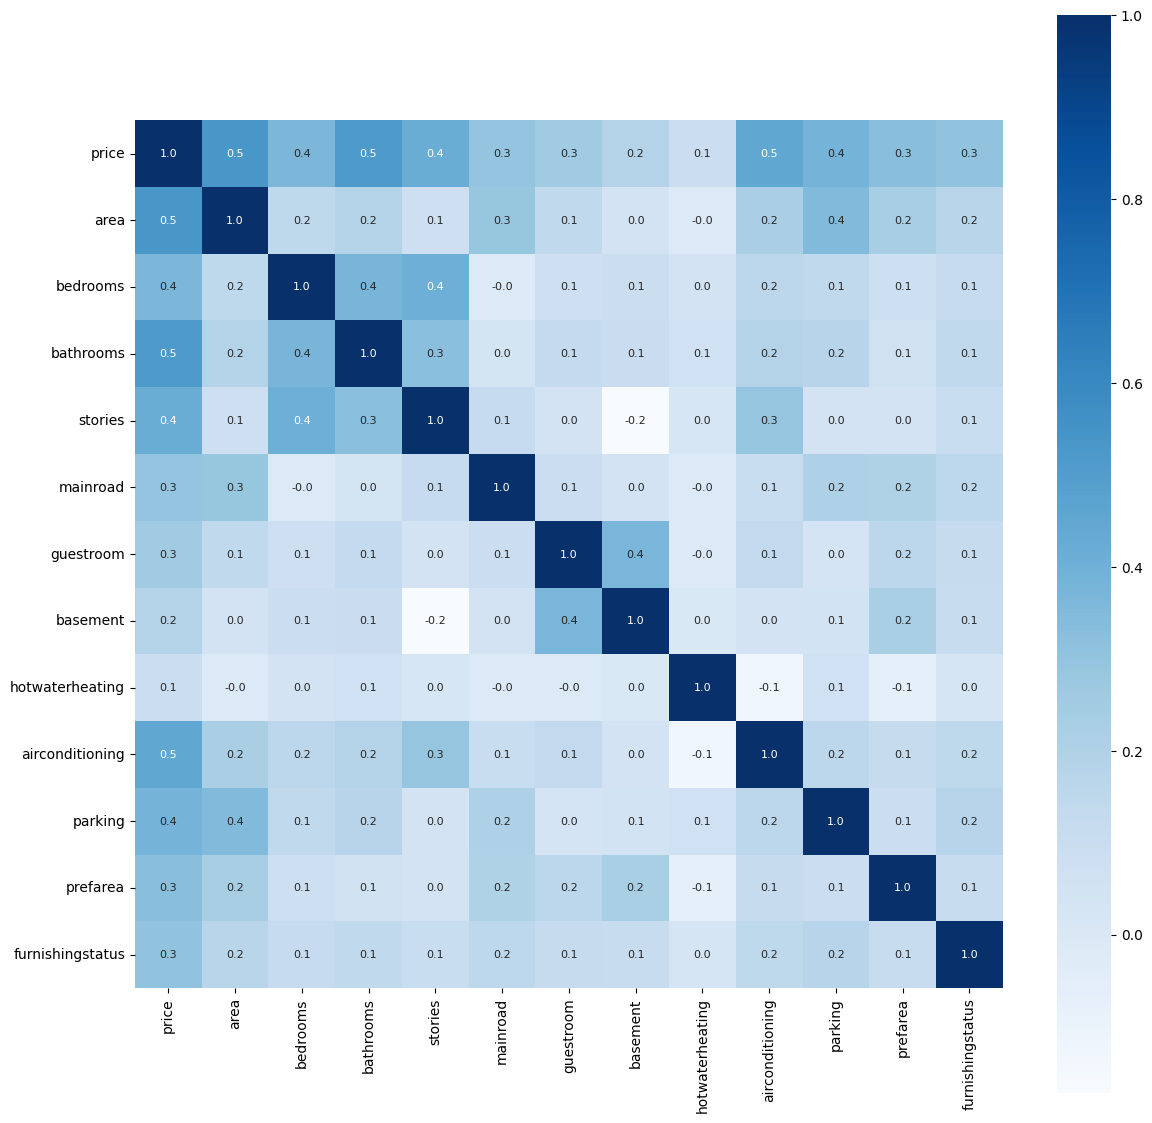

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
#Splitting the data and target

X = house_price_dataset.drop(['price'], axis=1)
Y = house_price_dataset['price']
print(X,Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(545, 12) (436, 12) (109, 12)


In [16]:
# load the model
model = XGBRegressor()

In [18]:
model.fit(X_train, Y_train)
     

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [19]:
training_data_prediction = model.predict(X_train)

In [20]:
print(training_data_prediction)

[ 3424222.   4270767.   2683287.   4791449.5  4129676.   6953162.
  2877948.2  2689605.   6933238.   4681389.5  3316203.8  2900007.8
  6003467.   5804279.   7766756.5  4123577.   5245065.   4591470.5
  7756017.5  4219297.5  4168722.2  2690382.2  5239920.5  4396851.
  3918579.2  4042381.   6799842.   9215863.   4642376.5  3237656.8
  3760464.   3075951.5  2362834.5  4035899.   4268145.   2839288.5
  4858737.5  3643904.8  1921622.5  7990241.5  4081057.2 12234883.
  8546704.   7393369.5  4020822.8  3205431.8  4303169.   3587664.
  3376537.5  2473200.5  5921071.   4051300.5  3857848.8  3180712.2
  4045365.2  5352052.   3652279.5  3790807.5  3622467.8  4138339.
  7544263.   4306240.5  5928919.   2996695.5  3796975.8  5526313.
  6702700.5  5857141.5  5406529.5  5620276.   3333574.2  3630378.8
  2862753.5  4958216.   5244960.5  3710378.8  5884058.   4211315.5
  6746079.5  5397818.   3119843.2  3564199.8  6575148.   4889165.5
  5866716.5  8390791.   2687594.   3291622.2  9790258.   4098177.5
 

In [21]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)
     

R Sqaured Error: 0.9968795776367188
Mean Absolute Error: 59136.6640625


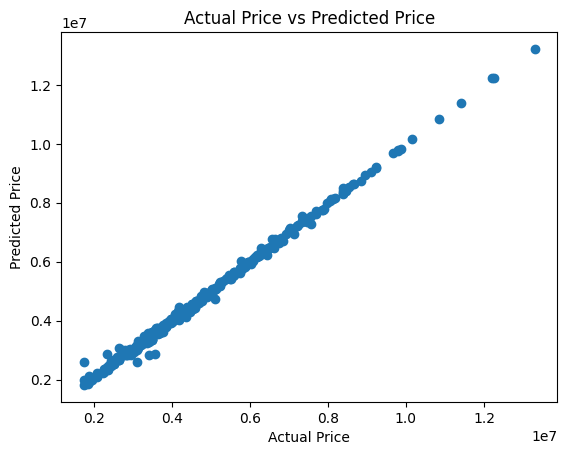

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()
     

In [23]:
test_data_prediction = model.predict(X_test)

In [24]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)
     

R Sqaured Error: 0.4464985728263855
Mean Absolute Error: 947907.25
